[Reference](https://betterprogramming.pub/create-plots-like-scott-galloway-911d45b689ca)

In [1]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 16.6 MB/s 
     |████████████████████████████████| 63 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


# Line Plot


[*********************100%***********************]  1 of 1 completed


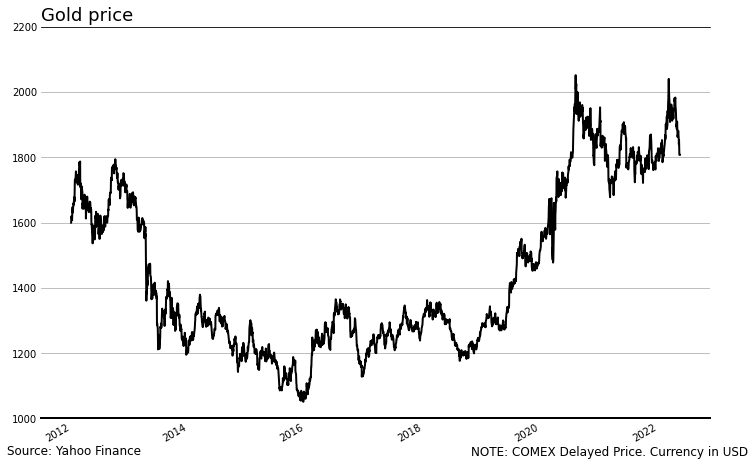

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

import yfinance as yf
import pandas as pd

# # Adding custom font
# font_dir = ['/mnt/c/Users/username/Downloads/Oswald']
# for font in font_manager.findSystemFonts(font_dir):
#     font_manager.fontManager.addfont(font)
    
# plt.rcParams['font.family'] = 'Oswald'

# Loading data from yfinance
df = yf.download('GC=F', start = '2012-01-01')
y = df['Close']

# Basic lineplot using pandas built-in method
ax = y.plot(kind='line', grid = True, color = 'black', figsize = (12, 8), linewidth=2)

# Hide X label if it is obvious
ax.set_xlabel('')

# Grid only shown in the horizontal direction
ax.grid(axis='x')

# Coordinates for additional text on the corners of the plot
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height

ax.text(left - 0.3, bottom - 0.35, 'Source: Yahoo Finance',
        horizontalalignment='left',
        verticalalignment='bottom',
        fontsize = 12,
        transform=ax.transAxes)

ax.text(right + 0.1, bottom - 0.32, 'NOTE: COMEX Delayed Price. Currency in USD',
        horizontalalignment='center',
        verticalalignment='top',
        fontsize = 12,
        transform=ax.transAxes)

# Set limits for Y-axis
ax.set_ylim(ymin=1000, ymax=2200)

# Remove small non-important details like spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)

# Ticks should be removed as well
ax.tick_params(axis=u'both', which=u'both', length = 0)

# Finally, show title
plt.title('Gold price', loc = 'left', fontsize=18)

plt.show()

# Histograms


[*********************100%***********************]  1 of 1 completed


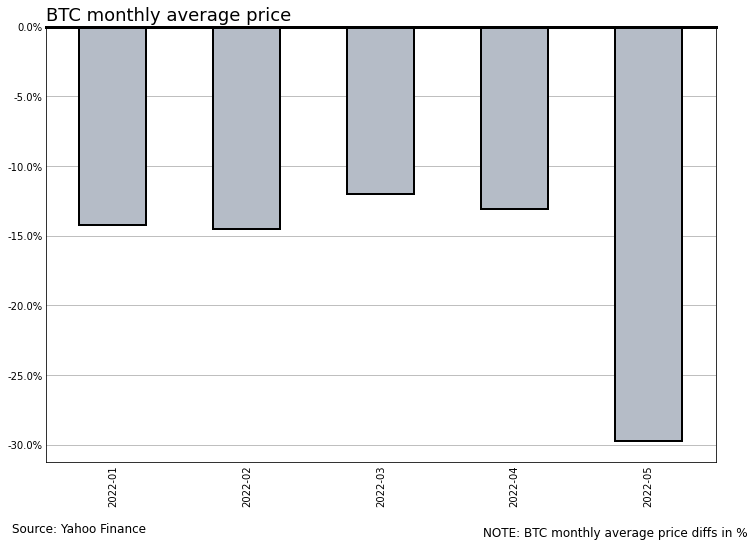

In [3]:
import matplotlib.ticker as mtick

import yfinance as yf
import pandas as pd

# Loading BTC data
btc = yf.download('BTC-USD', start = '2022-01-02')

# Script to calculate BTC monthly change in %
first_day_price = btc['Open'].values[0]
btc_monthly = btc.groupby(pd.PeriodIndex(btc.reset_index()['Date'], freq="M"))['Close'].mean()
perc = round((1 - btc_monthly/first_day_price) * -100, 2)

# Basic barplot using pandas built-in method
ax = perc.plot(kind = 'bar', color = '#b5bcc7', figsize = (12, 8), grid = True, zorder=2, edgecolor = 'black', linewidth = 2)

# Hiding X label
ax.set_xlabel('')

# A trick make the grid lines go beneath the boxes
ax.grid(zorder=0)

ax.grid(axis='x')

# X-axis highlighted to hint the reader where to start reading from
ax.spines['top'].set_linewidth(3)

# Coordinates for additional text on the corners of the plot
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height

ax.text(left - 0.3, bottom - 0.42, 'Source: Yahoo Finance',
        horizontalalignment='left',
        verticalalignment='bottom',
        fontsize = 12,
        transform=ax.transAxes)

ax.text(right + 0.1, bottom - 0.4, 'NOTE: BTC monthly average price diffs in %',
        horizontalalignment='center',
        verticalalignment='top',
        fontsize = 12,
        transform=ax.transAxes)

# Using percentage formater for Y-axis
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Hiding minor elements from axis
ax.tick_params(axis=u'both', which=u'both', length = 0)

# Show title
plt.title('BTC monthly average price', loc = 'left', fontsize=18)

plt.show()

# Image-Based Plots


In [4]:
# import matplotlib.pyplot as plt
# from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# def getImage(path, zoom=1):
#     return OffsetImage(plt.imread(path), zoom=zoom)

# # Names of images to show
# paths = [
#     '1.png',
#     '2.png',
#     '3.png']

# # Coordinates
# x = [100, 200, 300]
# y = [2, 2, 2]

# fig, ax = plt.subplots()
# fig.set_size_inches(15, 3)

# ax.scatter(x, y) 

# # Limit axis to have a control over borders
# ax.set_xlim(xmin=0, xmax=400)

# for x0, y0, path in zip(x, y, paths):
#     ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
#     ax.add_artist(ab)

# # Looks better without axis
# plt.axis('off')

# # Coordinates for additional text on the corners of the plot
# left, width = .25, .5
# bottom, height = .25, .5
# right = left + width
# top = bottom + height

# ax.text(0.25 * (left+right), 0.2 * (bottom+top), 'Facebook Logo 2015-2021',
#         horizontalalignment='center',
#         verticalalignment='center',
#         fontsize=14, color='black',
#         transform=ax.transAxes)

# ax.text(0.5 * (left+right), 0.2 * (bottom+top), 'Facebook Logo 2019-2021',
#         horizontalalignment='center',
#         verticalalignment='center',
#         fontsize=14, color='black',
#         transform=ax.transAxes)

# ax.text(0.75 * (left+right), 0.2 * (bottom+top), 'Facebook Logo 2022-Now',
#         horizontalalignment='center',
#         verticalalignment='center',
#         fontsize=14, color='black',
#         transform=ax.transAxes)

# # Show title
# plt.title('Facebook Logos', loc = 'center', fontsize=18)

# # plt.savefig('./fb-logos.png')